In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
print(df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].dtypes)
print(df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].isnull().sum())

trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
ca          float64
dtype: object
trestbps     59
chol         30
thalch       55
oldpeak      62
ca          611
dtype: int64


In [53]:
df1 = df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].fillna(df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']].mean())

In [54]:
df1.isnull().sum()

trestbps    0
chol        0
thalch      0
oldpeak     0
ca          0
dtype: int64

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df1)  # This will now work without errors

In [63]:
scaled_val_df = pd.DataFrame(X_scaled)

In [65]:
np.round(df1.describe(),1)

,trestbps,chol,thalch,oldpeak,ca
count,920.0,920.0,920.0,920.0,920.0
mean,132.1,199.1,137.5,0.9,0.7
std,18.4,109.0,25.1,1.1,0.5
min,0.0,0.0,60.0,-2.6,0.0
25%,120.0,177.8,120.0,0.0,0.7
50%,130.0,221.0,138.0,0.8,0.7
75%,140.0,267.0,156.0,1.5,0.7
max,200.0,603.0,202.0,6.2,3.0


In [66]:
np.round(scaled_val_df.describe(),1)

,0,1,2,3,4
count,920.0,920.0,920.0,920.0,920.0
mean,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0
min,-7.2,-1.8,-3.1,-3.3,-1.2
25%,-0.7,-0.2,-0.7,-0.8,-0.0
50%,-0.1,0.2,0.0,-0.1,-0.0
75%,0.4,0.6,0.7,0.6,-0.0
max,3.7,3.7,2.6,5.1,4.3


# Comparison Of Distribution

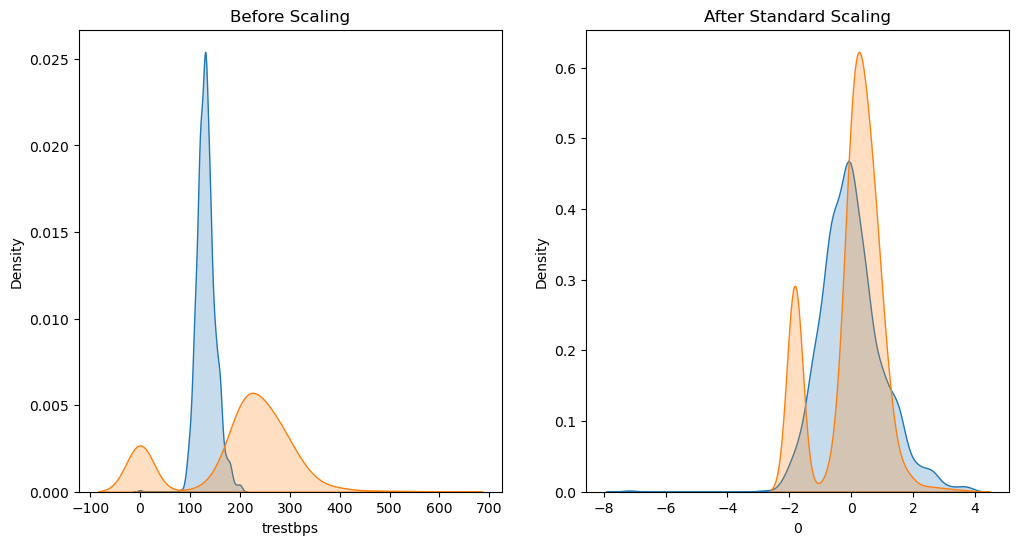

In [71]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,6))

# Before Scaling

ax1.set_title('Before Scaling')
sns.kdeplot(df1['trestbps'],ax = ax1,fill = True)
sns.kdeplot(df1['chol'],ax = ax1,fill = True)


# After Scaling

ax2.set_title('After Standard Scaling')
sns.kdeplot(scaled_val_df[0],ax=ax2,fill = True)
sns.kdeplot(scaled_val_df[1],ax=ax2,fill = True)

plt.show()

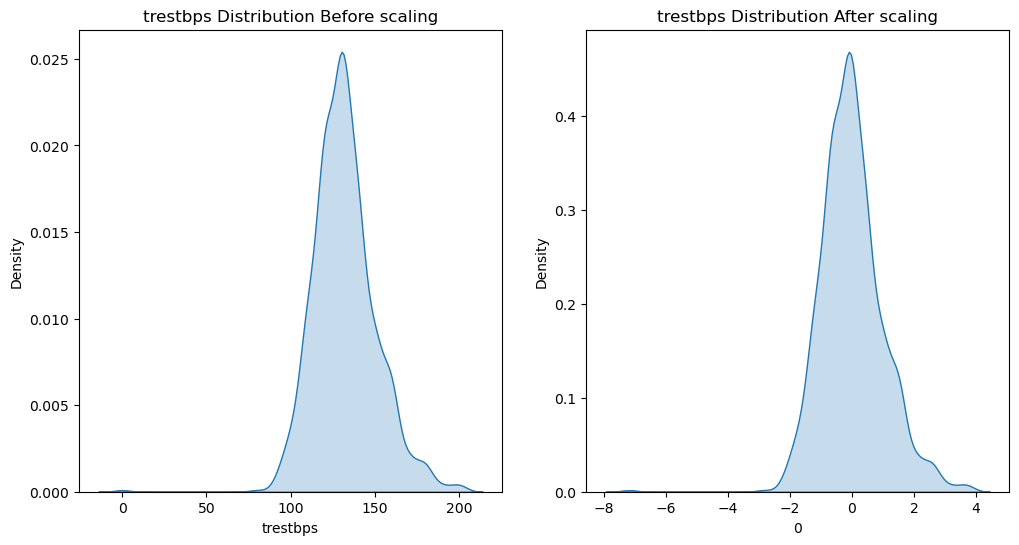

In [72]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,6))


# Before Scaling 

ax1.set_title("trestbps Distribution Before scaling")
sns.kdeplot(df1['trestbps'],ax = ax1,fill= True)

# After Scaling

ax2.set_title("trestbps Distribution After scaling")
sns.kdeplot(scaled_val_df[0],ax = ax2,fill = True)

plt.show()

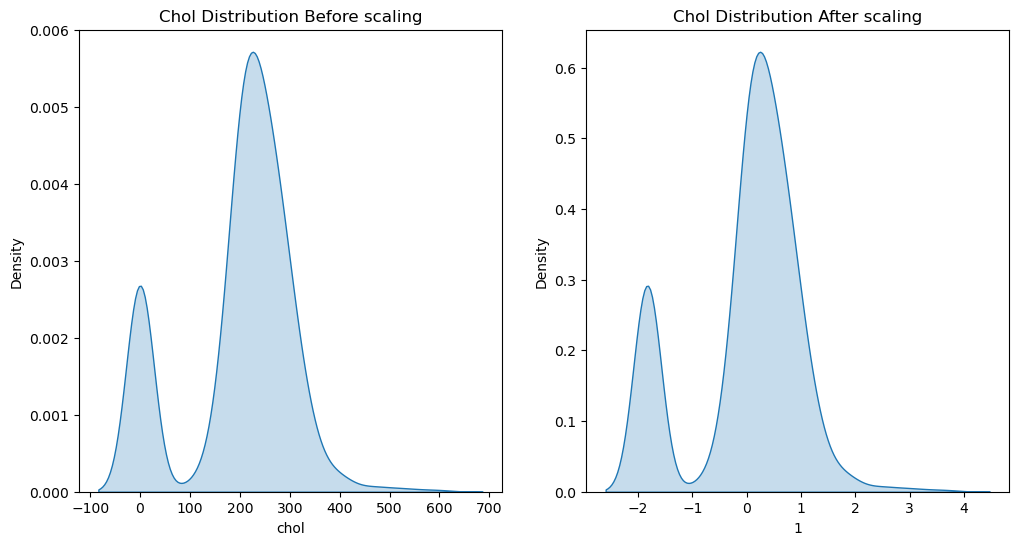

In [73]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,6))


# Before Scaling 

ax1.set_title("Chol Distribution Before scaling")
sns.kdeplot(df1['chol'],ax = ax1,fill = True)

# After Scaling

ax2.set_title("Chol Distribution After scaling")
sns.kdeplot(scaled_val_df[1],ax = ax2,fill = True)

plt.show()

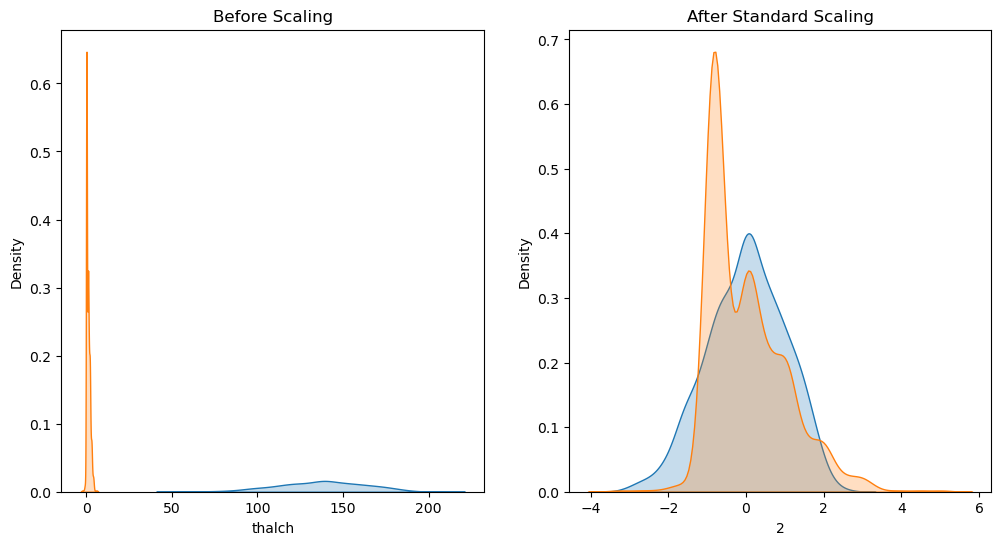

In [79]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,6))

# Before Scaling

ax1.set_title('Before Scaling')
sns.kdeplot(df1['thalch'],ax = ax1,fill = True)
sns.kdeplot(df1['oldpeak'],ax = ax1,fill = True)


# After Scaling

ax2.set_title('After Standard Scaling')
sns.kdeplot(scaled_val_df[2],ax=ax2,fill = True)
sns.kdeplot(scaled_val_df[3],ax=ax2,fill = True)

plt.show()

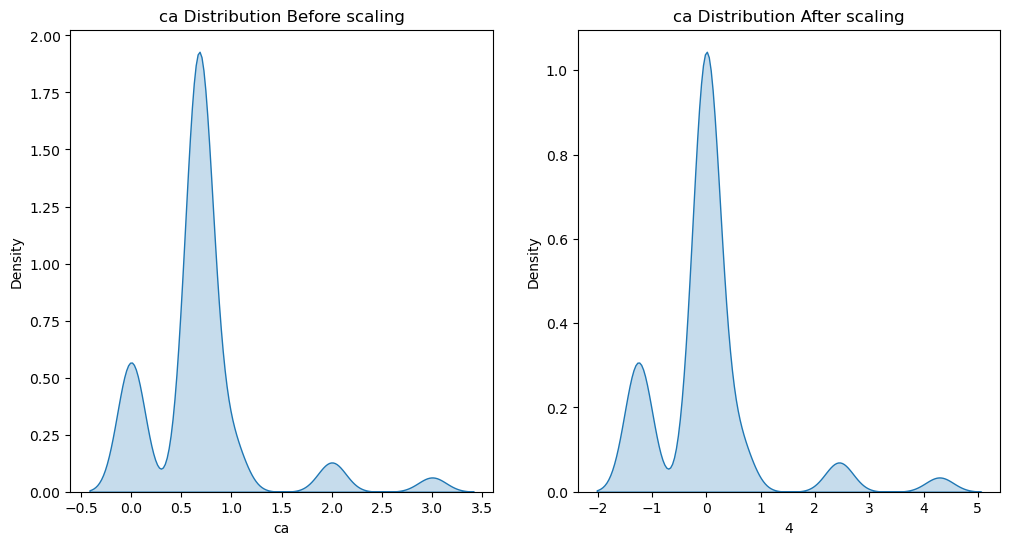

In [80]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,6))


# Before Scaling 

ax1.set_title("ca Distribution Before scaling")
sns.kdeplot(df1['ca'],ax = ax1,fill = True)

# After Scaling

ax2.set_title("ca Distribution After scaling")
sns.kdeplot(scaled_val_df[4],ax = ax2,fill = True)

plt.show()